# Geographic projections

Here, we'll explore what Python libraries give us map projections. Most libraries that include some form of mapping rely on Google Maps or Open Street Map as a backend that supplies the map tiles, which are displayed using the Mercator projection only. But the world isn't flat, and so when zoomed out enough this massively distorts land area. A projection is a way to take the spherical geometry of the Earth and project it onto a flat surface, i.e. our screens. 

Our adventure pretty much has to begin with Basemap.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.basemap import Basemap
from IPython.display import set_matplotlib_formats

In [2]:
from mpl_toolkits import basemap
print(basemap.supported_projections)

 cyl              Cylindrical Equidistant                 
 merc             Mercator                                
 tmerc            Transverse Mercator                     
 omerc            Oblique Mercator                        
 mill             Miller Cylindrical                      
 gall             Gall Stereographic Cylindrical          
 cea              Cylindrical Equal Area                  
 lcc              Lambert Conformal                       
 laea             Lambert Azimuthal Equal Area            
 nplaea           North-Polar Lambert Azimuthal           
 splaea           South-Polar Lambert Azimuthal           
 eqdc             Equidistant Conic                       
 aeqd             Azimuthal Equidistant                   
 npaeqd           North-Polar Azimuthal Equidistant       
 spaeqd           South-Polar Azimuthal Equidistant       
 aea              Albers Equal Area                       
 stere            Stereographic                         

In [3]:
# create a Robinson projection that's centered around 
# lon=0, the prime meridian
m = Basemap(projection='robin', lon_0=0.)

fig = plt.figure(figsize=(20,10))

# background color of grey
fig.patch.set_facecolor('#e6e8ec')

# draw white with no boundary line
m.drawmapboundary(color='none', fill_color='white')

# draw continents and countries, with the coastline adding extra definition
#m.drawcoastlines(color='white')
m.fillcontinents(color='black', lake_color='white')
m.drawcountries(linewidth=1, color='white')

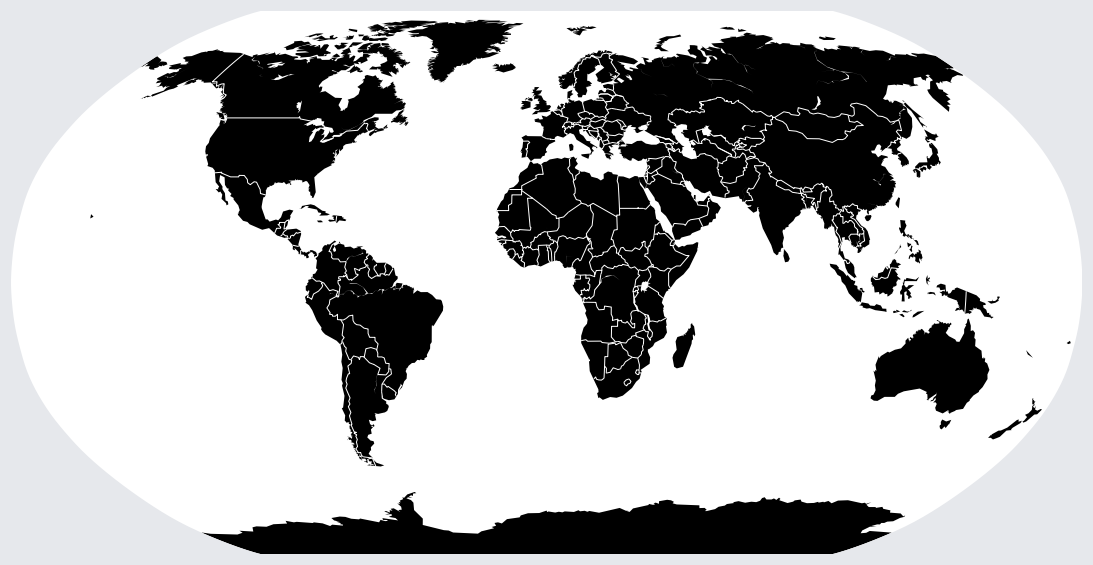

In [4]:
plt.show()

In [15]:
import geopandas
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,28400000.0,Asia,Afghanistan,AFG,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,..."
1,12799293.0,Africa,Angola,AGO,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...
2,3639453.0,Europe,Albania,ALB,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,..."
3,4798491.0,Asia,United Arab Emirates,ARE,184300.0,"POLYGON ((51.57951867046327 24.24549713795111,..."
4,40913584.0,South America,Argentina,ARG,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...


In [6]:
# world = world[(world.name!="Antarctica")]
mercator = '+proj=merc'
robinson = '+proj=robin'
wgs84 = '+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs'

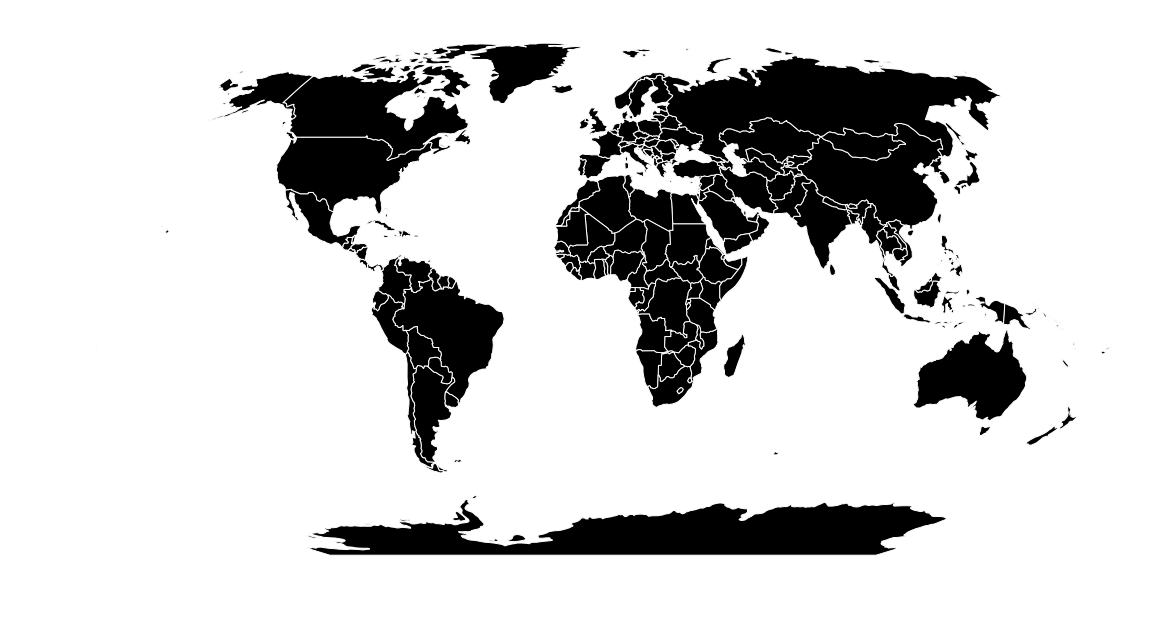

In [16]:
# robinson projection
worldRobinson = world.to_crs(robinson)
worldRobinson.plot(figsize=(20,20), color="black", linewidth=1, edgecolor="white",)
plt.axis('off')
plt.show()

### References
Chris Roach's talk about Basemap: https://www.youtube.com/watch?v=ZIEyHdvF474

...and his GitHub repo of the same: https://github.com/croach/oreilly-matplotlib-course/blob/master/07%20-%20Mapping%20in%20matplotlib/0702%20-%20Working%20With%20Maps.ipynb
